In [1]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
IMG_SIZE = 224
BATCH_SIZE = 32
NO_EPOCHS = 2
NUM_CLASSES = 2
DATA_FOLDER = "C:/Users/CCL/Desktop/train_set (1)"
test_folder="C:/Users/CCL/Desktop/test_set"
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import cv2 as cv
from random import shuffle 
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
from keras.applications.resnet import ResNet50
from tensorflow.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import tensorflow_addons as tfa
import tensorflow as tf
%matplotlib inline 
#from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

C:\Users\CCL\CONDA\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [7]:
data_train = pd.read_excel(open("train_set.xlsx", 'rb'), sheet_name='Sheet1')
data_test = pd.read_excel(open("test_set1.xlsx", 'rb'), sheet_name='Sheet1')

In [8]:
data_test

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,4128,59,Female,4128_left.jpg,4128_right.jpg,moderate non proliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
1,4129,57,Female,4129_left.jpg,4129_right.jpg,hypertensive retinopathy,mild nonproliferative retinopathy，hypertensive...,0,1,0,0,0,1,0,0
2,4130,58,Female,4130_left.jpg,4130_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3,4131,56,Female,4131_left.jpg,4131_right.jpg,proliferative diabetic retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
4,4133,60,Male,4133_left.jpg,4133_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
498,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
499,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
500,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [9]:
data_test['C'].value_counts()

0    501
1      1
Name: C, dtype: int64

In [10]:
data_train.columns.unique()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O'],
      dtype='object')

In [11]:
data_train.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [12]:
data_test.columns.unique()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O'],
      dtype='object')

In [13]:
data_test=data_test.rename(columns={'Left-Fundus':'Left_Fundus', 'Right-Fundus':'Right_Fundus', 'Left-Diagnostic Keywords':'Left_Diagnostic_Keywords', 'Right-Diagnostic Keywords':'Right_Diagnostic_Keywords'})

In [14]:
data_test.columns.unique()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left_Fundus', 'Right_Fundus',
       'Left_Diagnostic_Keywords', 'Right_Diagnostic_Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O'],
      dtype='object')

In [15]:
print(data_train.loc[(data_train.cataract==1)].shape)
print(data_train.loc[data_train.cataract==0].shape)
print(data_test.loc[(data_test.C==1)].shape)
print(data_test.loc[data_test.C==0].shape)

(211, 15)
(2787, 15)
(1, 15)
(501, 15)


In [16]:
data_train.loc[(data_train.cataract==1)]['left_diagnosys'].value_counts()

cataract                                                                   135
normal fundus                                                               24
cataract，lens dust                                                           8
moderate non proliferative retinopathy                                       6
lens dust，cataract                                                           5
mild nonproliferative retinopathy                                            5
lens dust，normal fundus                                                      4
refractive media opacity                                                     3
normal fundus，lens dust                                                      3
cataract，moderate non proliferative retinopathy                              3
cataract，mild nonproliferative retinopathy                                   2
severe proliferative diabetic retinopathy                                    2
moderate non proliferative retinopathy，cataract     

In [17]:
data_train.loc[(data_train.cataract==1)]['right_diagnosys'].value_counts()


cataract                                                      127
normal fundus                                                  24
moderate non proliferative retinopathy                          9
cataract，lens dust                                              6
drusen                                                          5
lens dust，cataract                                              5
refractive media opacity                                        4
mild nonproliferative retinopathy                               4
cataract，moderate non proliferative retinopathy                 3
epiretinal membrane                                             3
macular epiretinal membrane                                     3
moderate non proliferative retinopathy，cataract                 3
hypertensive retinopathy，cataract                               2
lens dust，normal fundus                                         2
cataract，branch retinal vein occlusion                          1
cataract，m

In [18]:
def has_cataract_mentioned(text):
    if 'cataract' in text:
        return 1
    else:
        return 0

In [19]:
data_train['le_cataract'] = data_train['left_diagnosys'].apply(lambda x: has_cataract_mentioned(x))
data_train['re_cataract'] = data_train['right_diagnosys'].apply(lambda x: has_cataract_mentioned(x))

In [22]:
data_test['le_cataract'] = data_test['Left_Diagnostic_Keywords'].apply(lambda x: has_cataract_mentioned(x))
data_test['re_cataract'] = data_test['Right_Diagnostic_Keywords'].apply(lambda x: has_cataract_mentioned(x))

In [23]:
cataract_le_list = data_train.loc[(data_train.cataract==1) & (data_train.le_cataract==1)]['left_fundus'].values
cataract_re_list = data_train.loc[(data_train.cataract==1) & (data_train.re_cataract==1)]['right_fundus'].values
print(len(cataract_le_list), len(cataract_re_list))
non_cataract_le_list = data_train.loc[(data_train.cataract==0) & (data_train.left_diagnosys=="normal fundus")]['left_fundus'].sample(150, random_state=314).values
non_cataract_re_list = data_train.loc[(data_train.cataract==0) & (data_train.right_diagnosys=="normal fundus")]['right_fundus'].sample(150, random_state=314).values
print(len(non_cataract_le_list), len(non_cataract_re_list))

159 153
150 150


In [24]:
cataract_le_list1 = data_test.loc[(data_test.C==1) & (data_test.C==1)]['Left_Fundus'].values
cataract_re_list1 = data_test.loc[(data_test.C==1) & (data_test.C==1)]['Right_Fundus'].values
print(len(cataract_le_list1), len(cataract_re_list1))
non_cataract_le_list1 = data_test.loc[(data_test.C==0) & (data_test.Left_Diagnostic_Keywords=="normal fundus")]['Left_Fundus'].sample(80).values
non_cataract_re_list1 = data_test.loc[(data_test.C==0) & (data_test.Right_Diagnostic_Keywords=="normal fundus")]['Right_Fundus'].sample(50).values
print(len(non_cataract_le_list1), len(non_cataract_re_list1))

1 1
80 50


In [25]:
cataract_list = np.concatenate((cataract_le_list, cataract_re_list), axis = 0)
non_cataract_list = np.concatenate((non_cataract_le_list, non_cataract_re_list), axis = 0)
print(len(non_cataract_list), len(cataract_list))

300 312


In [26]:
cataract_list1 = np.concatenate((cataract_le_list1, cataract_re_list1), axis = 0)
non_cataract_list1 = np.concatenate((non_cataract_le_list1, non_cataract_re_list1), axis = 0)
print(len(non_cataract_list1), len(cataract_list1))

130 2


In [27]:
print(len(os.listdir(DATA_FOLDER)))

5996


In [28]:
print(len(os.listdir(test_folder)))

1004


In [29]:
def label_image(label):
    if label == 1:
        return [1,0]
    elif label == 0: 
        return [0,1]

def process_data(data_image_list, DATA_FOLDER, is_cataract):
    data_train = []
    for img in tqdm(data_image_list):
        path = os.path.join(DATA_FOLDER,img)
        label = label_image(is_cataract)
        img = cv.imread(path,cv.IMREAD_COLOR)
        img = cv.resize(img, (IMG_SIZE,IMG_SIZE))
        data_train.append([np.array(img),np.array(label)])
    shuffle(data_train)
    return data_train

In [30]:
def label_image(label):
    if label == 1:
        return [1,0]
    elif label == 0: 
        return [0,1]

def process_data(data_image_list, test_folder, is_cataract):
    data_test = []
    for img in tqdm(data_image_list):
        path = os.path.join(test_folder,img)
        label = label_image(is_cataract)
        img = cv.imread(path,cv.IMREAD_COLOR)
        img = cv.resize(img, (IMG_SIZE,IMG_SIZE))
        data_test.append([np.array(img),np.array(label)])
    shuffle(data_test)
    return data_test

In [31]:
cat_df = process_data(cataract_list, DATA_FOLDER, 1)

100%|████████████████████████████████████████████████████████████████████████████████| 312/312 [01:08<00:00,  4.56it/s]


In [32]:
cat_df1 = process_data(cataract_list1, test_folder, 1)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.74it/s]


In [33]:
cat_no_df1 = process_data(non_cataract_list1, test_folder, 0)

100%|████████████████████████████████████████████████████████████████████████████████| 130/130 [00:22<00:00,  5.78it/s]


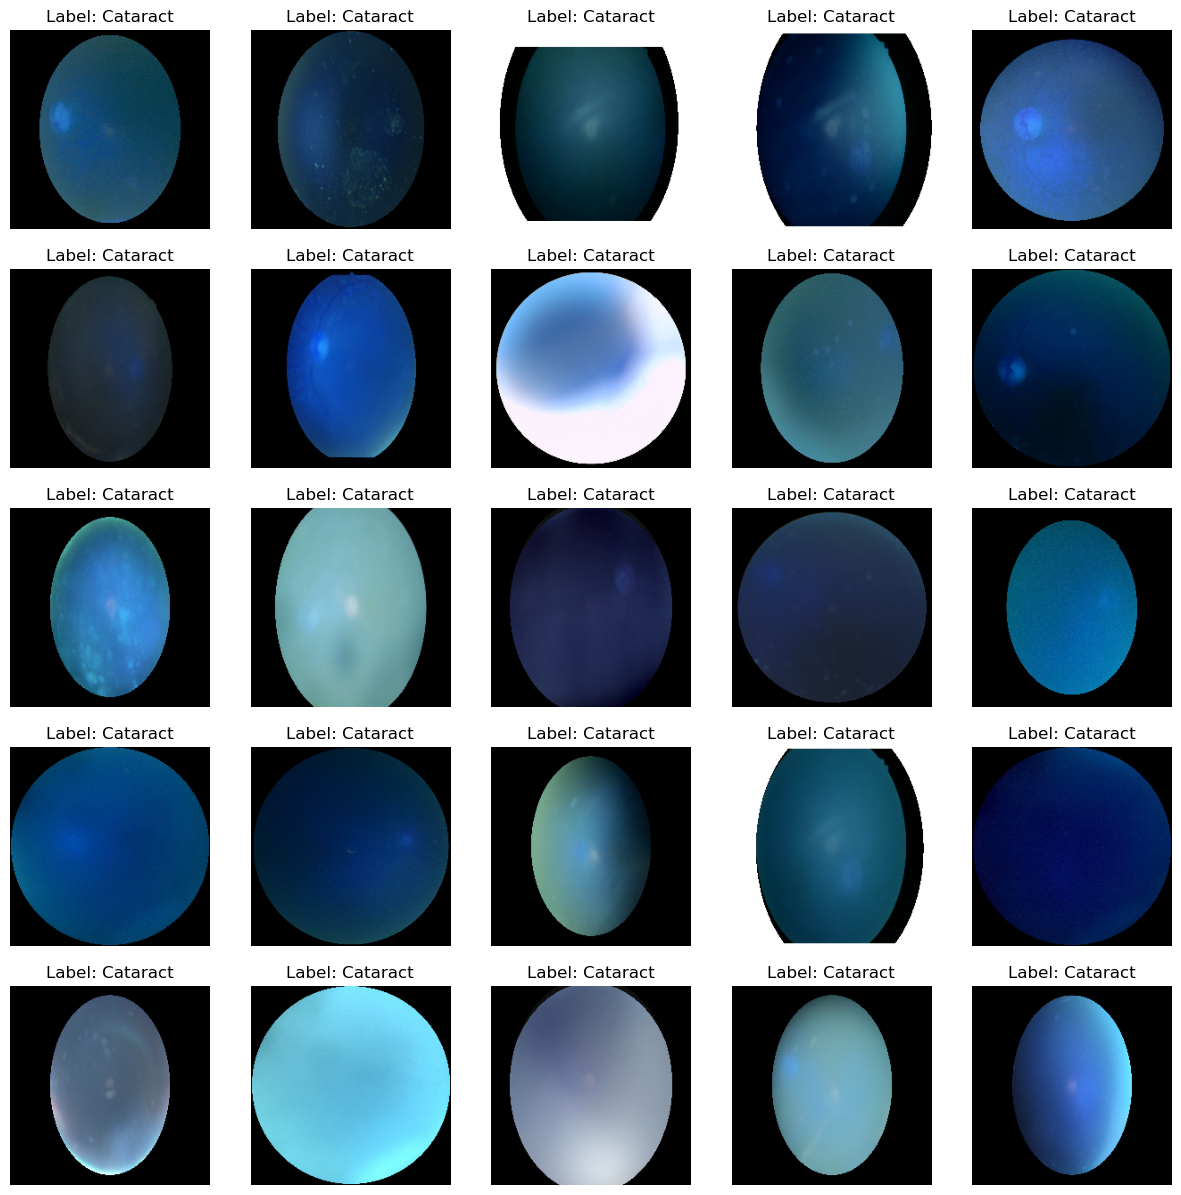

In [34]:
def show_images(data, isTest=False):
    f, ax = plt.subplots(5,5, figsize=(15,15))
    for i,data in enumerate(data[:25]):
        img_num = data[1]
        img_data = data[0]
        label = np.argmax(img_num)
        if label  == 0: 
            str_label='Cataract'
        elif label == 1: 
            str_label='No Cataract'
        if(isTest):
            str_label="None"
        ax[i//5, i%5].imshow(img_data)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("Label: {}".format(str_label))
    plt.show()

show_images(cat_df)


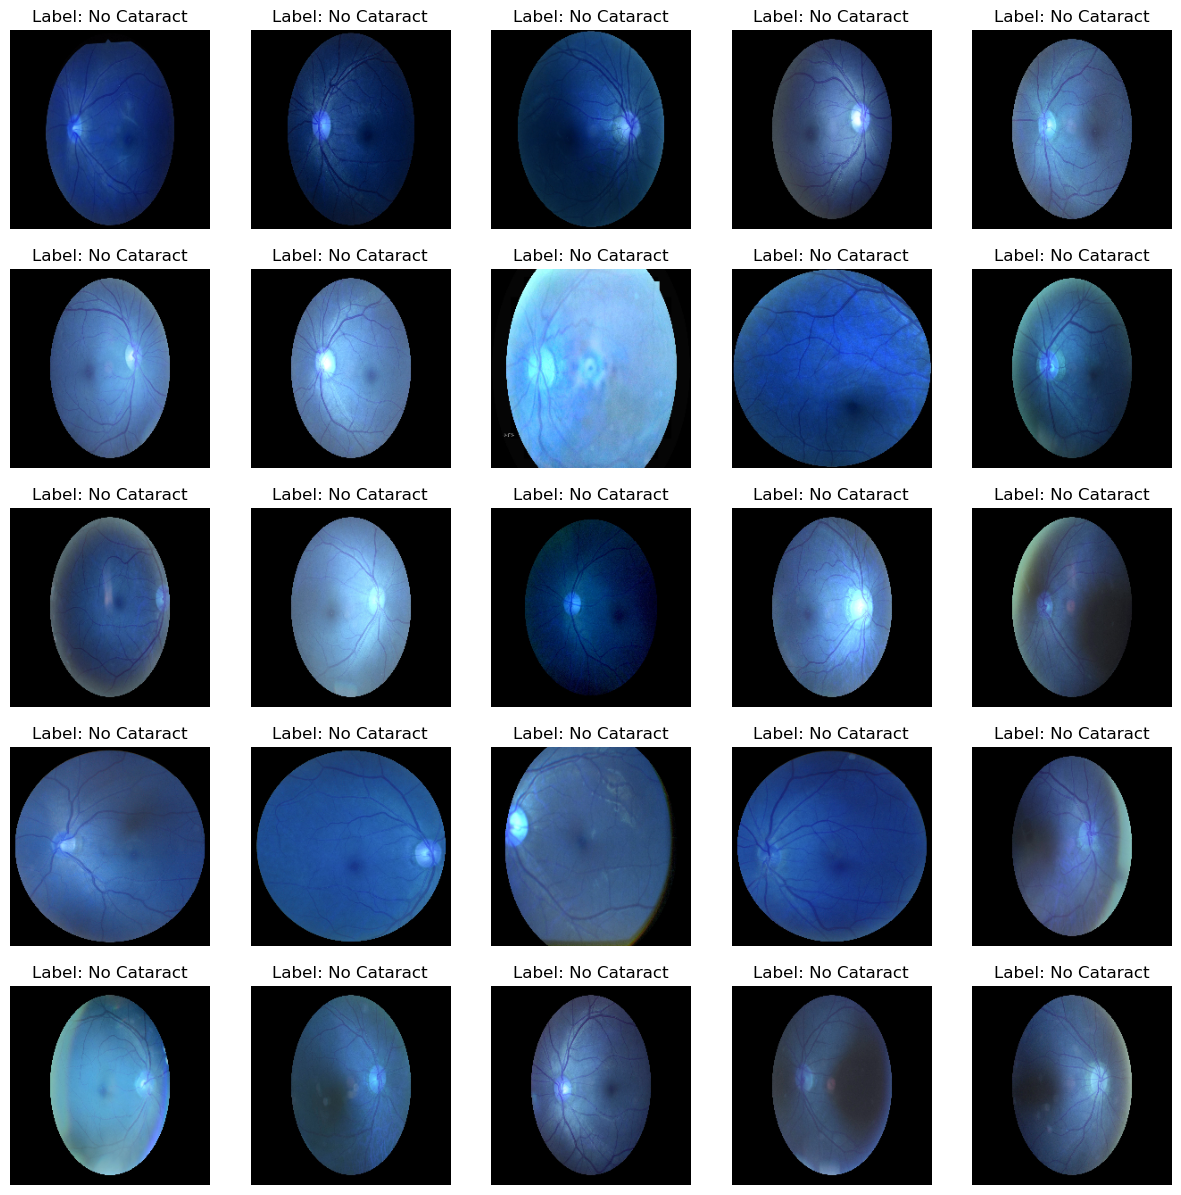

In [50]:
show_images(cat_no_df1)

In [46]:
train = cat_df + cat_no_df
shuffle(train)
show_images(train)

NameError: name 'cat_no_df' is not defined

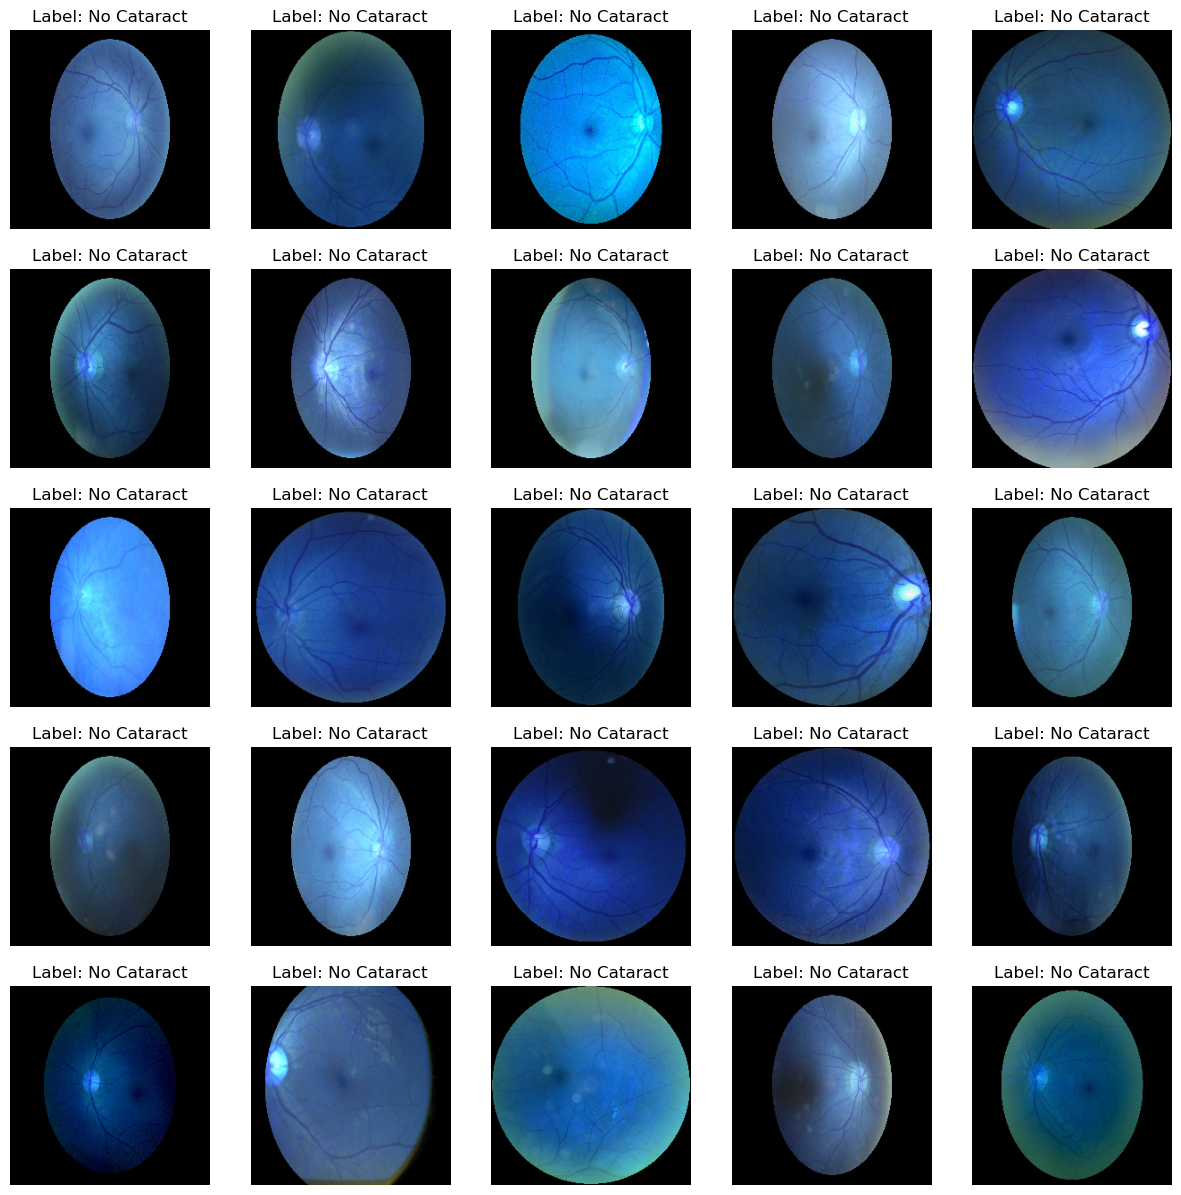

In [47]:
test = cat_df1 + cat_no_df1
shuffle(test)
show_images(test)

In [48]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])

NameError: name 'train' is not defined

In [51]:
X_val= np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_val = np.array([i[1] for i in test])

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and a relu activation function
model.add(Dense(units=128, activation='relu'))

# Add a dropout layer to reduce overfitting
model.add(Dropout(rate=0.5))

# Add the output layer with a sigmoid activation function
model.add(Dense(units=1, activation='sigmoid'))

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [53]:
opt = tfa.optimizers.LazyAdam()
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)
model.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [55]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [56]:
X_train=X
y_train=y

NameError: name 'X' is not defined

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np

X_train = np.random.rand(1000,128,128,3)
y_train = np.random.rand(1000,2)
X_val = np.random.rand(200,128,128,3)
y_val = np.random.rand(200,2)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
32/32 [==============================] - 30s 763ms/step - loss: 7.6653 - accuracy: 0.4810 - val_loss: 79.0669 - val_accuracy: 0.5200
Epoch 2/10
32/32 [==============================] - 23s 704ms/step - loss: 0.7569 - accuracy: 0.5110 - val_loss: 92.2880 - val_accuracy: 0.5200
Epoch 3/10
32/32 [==============================] - 24s 746ms/step - loss: 0.7106 - accuracy: 0.5220 - val_loss: 3.0577 - val_accuracy: 0.4800
Epoch 4/10
32/32 [==============================] - 23s 712ms/step - loss: 0.7047 - accuracy: 0.5380 - val_loss: 3.1188 - val_accuracy: 0.4800
Epoch 5/10
32/32 [==============================] - 24s 748ms/step - loss: 0.6989 - accuracy: 0.5710 - val_loss: 1.0399 - val_accuracy: 0.4800
Epoch 6/10
32/32 [==============================] - 24s 740ms/step - loss: 0.7230 - accuracy: 0.5520 - val_loss: 0.7640 - val_accuracy: 0.5200
Epoch 7/10
32/32 [==============================] - 23s 708ms/step - loss: 0.7118 - accuracy: 0.5530 - val_loss: 4.8580 - val_accuracy: 0.52

In [36]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [37]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

NameError: name 'history' is not defined

In [43]:
# Assuming you have loaded your data using a function like load_data()
# For example: (X_train, y_train), (X_val, y_val) = load_data()

# Resize the images to the desired shape (128, 128)
X_val_resized = tf.image.resize(X_val, (128, 128))

# Evaluate the model
score = model.evaluate(X_val_resized, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])



NameError: name 'X_val' is not defined

In [44]:
# Assuming you have loaded your data using a function like load_data()
# For example: (X_train, y_train), (X_val, y_val) = load_data()

# Resize the images to the desired shape (128, 128)
X_val_resized = tf.image.resize(X_val, (128, 128))

# Evaluate the model
score = model.evaluate(X_val_resized, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


NameError: name 'X_val' is not defined

In [39]:
# Assuming you have X_val and y_val loaded from your dataset
# Resize the images to the desired shape (128, 128)
X_val_resized = tf.image.resize(X_val, (128, 128))

# Get the predictions for the resized evaluation data
predicted_probs = model.predict(X_val_resized)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Get the indices to be plotted
y_true = np.argmax(y_val, axis=1)


NameError: name 'X_val' is not defined

In [40]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

NameError: name 'predicted_classes' is not defined

In [41]:
target_names = ["Cataract", "Normal"]
print(classification_report(y_true, predicted_classes, target_names=target_names))

NameError: name 'y_true' is not defined